In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\Stuart_bm\Stuart_bmcite_RNAassay_original.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata = sc.read_h5ad(dataset_dir / 'Stuart_bm/Stuart_bmcite_RNAassay_original.h5ad')
adata.shape

(30672, 17009)

In [3]:
adata.obs.head()

,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,celltype.l1,celltype.l2,RNA.weight
a_AAACCTGAGCTTATCG-1,7546.0,2136,1350.0,25,HumanHTO4,batch1,Progenitor cells,Prog_RBC,0.482701
a_AAACCTGAGGTGGGTT-1,1029.0,437,2970.0,25,HumanHTO1,batch1,T cell,gdT,0.241789
a_AAACCTGAGTACATGA-1,1111.0,429,2474.0,23,HumanHTO5,batch1,T cell,CD4 Naive,0.507714
a_AAACCTGCAAACCTAC-1,2741.0,851,4799.0,25,HumanHTO3,batch1,T cell,CD4 Memory,0.431308
a_AAACCTGCAAGGTGTG-1,2099.0,843,5434.0,25,HumanHTO2,batch1,Mono/DC,CD14 Mono,0.568508


In [4]:
# Level1
labels = adata.obs['celltype.l2'].tolist()
types = np.unique(labels).tolist()
types

['CD14 Mono',
 'CD16 Mono',
 'CD4 Memory',
 'CD4 Naive',
 'CD56 bright NK',
 'CD8 Effector_1',
 'CD8 Effector_2',
 'CD8 Memory_1',
 'CD8 Memory_2',
 'CD8 Naive',
 'GMP',
 'HSC',
 'LMPP',
 'MAIT',
 'Memory B',
 'NK',
 'Naive B',
 'Plasmablast',
 'Prog_B 1',
 'Prog_B 2',
 'Prog_DC',
 'Prog_Mk',
 'Prog_RBC',
 'Treg',
 'cDC2',
 'gdT',
 'pDC']

## Read annotation result from CellAssign (L2)
Using top 59 DEGs (Hao L2 PreLect feature number median = 59)

In [4]:
pred_l2 = pd.read_csv('CellAssign_DEGmedian_pred_Stuart_L2.csv', index_col=0)
pred_l2.head()

,CD14 Mono,CD16 Mono,CD4 Memory,CD4 Naive,CD56 bright NK,CD8 Effector_1,CD8 Effector_2,CD8 Memory_1,CD8 Memory_2,CD8 Naive,...,Plasmablast,Prog_B 1,Prog_B 2,Prog_DC,Prog_Mk,Prog_RBC,Treg,cDC2,gdT,pDC
a_AAACCTGAGCTTATCG-1,4.775238e-79,3.140430e-89,3.411169e-91,1.261856e-72,9.436476e-84,9.850353e-71,3.285108e-85,1.982630e-49,1.735576e-85,3.598600e-92,...,4.557205e-72,1.167761e-48,1.182783e-32,2.604648e-45,1.000000e+00,1.189884e-33,1.108626e-96,2.488530e-75,2.066276e-73,6.290281e-79
a_AAACCTGAGGTGGGTT-1,9.305645e-31,1.101671e-33,1.144837e-43,4.021758e-34,6.735249e-23,5.636972e-20,6.519979e-17,1.000000e+00,1.554164e-18,2.202497e-58,...,1.087319e-33,1.609913e-30,1.710240e-25,3.991176e-31,1.821499e-33,2.670878e-24,5.716263e-55,7.946836e-29,9.903030e-11,5.441397e-28
a_AAACCTGAGTACATGA-1,2.010148e-43,1.682180e-42,8.310384e-49,3.809446e-32,4.365388e-26,2.032379e-20,9.093348e-16,1.000000e+00,3.012355e-20,1.527746e-53,...,1.016264e-37,2.481908e-34,9.218232e-33,2.319280e-39,8.577714e-37,1.523911e-30,7.571062e-50,1.404535e-39,7.089963e-20,8.116641e-33
a_AAACCTGCAAACCTAC-1,1.947023e-76,8.510833e-80,4.963688e-65,1.942599e-60,1.623386e-54,1.354842e-33,9.234533e-25,1.000000e+00,3.108516e-28,2.987626e-85,...,3.490580e-78,4.104858e-74,1.078623e-71,5.206918e-76,7.875848e-70,3.580614e-74,6.417839e-66,1.401468e-79,3.342110e-33,4.973831e-74
a_AAACCTGCAAGGTGTG-1,1.000000e+00,1.539341e-155,7.543349e-281,1.233056e-266,8.894748e-217,5.460569e-225,1.320637e-220,9.830958e-225,1.691998e-220,2.545223e-290,...,1.055539e-234,6.422316e-227,5.067874e-227,2.706433e-211,3.492110e-229,9.532201e-226,2.509232e-283,3.866331e-126,6.737782e-227,7.389677e-211


In [6]:
# Assign prediction celltype by score
largest_values = []
largest_columns = []
assignments = []
for index, row in pred_l2.iterrows():
    # find largest value and their corresponding columns
    largest_value = row.max()
    largest_column = row.idxmax()
    largest_values.append(largest_value)
    largest_columns.append(largest_column)

    assign = largest_column
    assignments.append(assign)

# result_df = pd.DataFrame({'Largest Value': largest_values, 'Largest Column': largest_columns, 'Assignment': assignments})
# result_df.shape
pred_l2['Assignment'] = assignments
pred_l2.head()


,CD14 Mono,CD16 Mono,CD4 Memory,CD4 Naive,CD56 bright NK,CD8 Effector_1,CD8 Effector_2,CD8 Memory_1,CD8 Memory_2,CD8 Naive,...,Prog_B 1,Prog_B 2,Prog_DC,Prog_Mk,Prog_RBC,Treg,cDC2,gdT,pDC,Assignment
a_AAACCTGAGCTTATCG-1,4.775238e-79,3.140430e-89,3.411169e-91,1.261856e-72,9.436476e-84,9.850353e-71,3.285108e-85,1.982630e-49,1.735576e-85,3.598600e-92,...,1.167761e-48,1.182783e-32,2.604648e-45,1.000000e+00,1.189884e-33,1.108626e-96,2.488530e-75,2.066276e-73,6.290281e-79,Prog_Mk
a_AAACCTGAGGTGGGTT-1,9.305645e-31,1.101671e-33,1.144837e-43,4.021758e-34,6.735249e-23,5.636972e-20,6.519979e-17,1.000000e+00,1.554164e-18,2.202497e-58,...,1.609913e-30,1.710240e-25,3.991176e-31,1.821499e-33,2.670878e-24,5.716263e-55,7.946836e-29,9.903030e-11,5.441397e-28,CD8 Memory_1
a_AAACCTGAGTACATGA-1,2.010148e-43,1.682180e-42,8.310384e-49,3.809446e-32,4.365388e-26,2.032379e-20,9.093348e-16,1.000000e+00,3.012355e-20,1.527746e-53,...,2.481908e-34,9.218232e-33,2.319280e-39,8.577714e-37,1.523911e-30,7.571062e-50,1.404535e-39,7.089963e-20,8.116641e-33,CD8 Memory_1
a_AAACCTGCAAACCTAC-1,1.947023e-76,8.510833e-80,4.963688e-65,1.942599e-60,1.623386e-54,1.354842e-33,9.234533e-25,1.000000e+00,3.108516e-28,2.987626e-85,...,4.104858e-74,1.078623e-71,5.206918e-76,7.875848e-70,3.580614e-74,6.417839e-66,1.401468e-79,3.342110e-33,4.973831e-74,CD8 Memory_1
a_AAACCTGCAAGGTGTG-1,1.000000e+00,1.539341e-155,7.543349e-281,1.233056e-266,8.894748e-217,5.460569e-225,1.320637e-220,9.830958e-225,1.691998e-220,2.545223e-290,...,6.422316e-227,5.067874e-227,2.706433e-211,3.492110e-229,9.532201e-226,2.509232e-283,3.866331e-126,6.737782e-227,7.389677e-211,CD14 Mono


In [7]:
pred_types_l1 = np.unique(pred_l2['Assignment']).tolist()
pred_types_l1

['CD14 Mono',
 'CD16 Mono',
 'CD56 bright NK',
 'CD8 Effector_1',
 'CD8 Effector_2',
 'CD8 Memory_1',
 'CD8 Memory_2',
 'GMP',
 'HSC',
 'LMPP',
 'MAIT',
 'Memory B',
 'NK',
 'Naive B',
 'Plasmablast',
 'Prog_B 1',
 'Prog_B 2',
 'Prog_DC',
 'Prog_Mk',
 'Prog_RBC',
 'cDC2',
 'gdT',
 'pDC']

In [8]:
true_labels = adata.obs['celltype.l2']
predicted_labels = pred_l2['Assignment']

cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['CellAssign predicted'], margins=False)
order = ['Memory B', 'Naive B', 
             'CD4 Memory', 'CD4 Naive', 
             'CD8 Naive', 'CD8 Effector_1', 'CD8 Effector_2', 'CD8 Memory_1', 'CD8 Memory_2', 
             'MAIT', 'gdT', 'Treg', 
             'cDC2', 'pDC', 
             'CD14 Mono', 'CD16 Mono', 
             'NK', 'CD56 bright NK', 
             'Plasmablast', 
             'HSC', 'GMP', 'LMPP', 'Prog_RBC', 'Prog_B 1', 'Prog_B 2', 'Prog_DC', 'Prog_Mk']
# Reorder columns
# cm = cm[[o for o in order if o in cm.columns]]
# Reorder rows
# cm = cm.reindex(order, axis=0)
cm = cm.reindex(index=order, columns=order, fill_value=0)
print(cm.shape)
cm

(27, 27)


CellAssign predicted,Memory B,Naive B,CD4 Memory,CD4 Naive,CD8 Naive,CD8 Effector_1,CD8 Effector_2,CD8 Memory_1,CD8 Memory_2,MAIT,...,CD56 bright NK,Plasmablast,HSC,GMP,LMPP,Prog_RBC,Prog_B 1,Prog_B 2,Prog_DC,Prog_Mk
True,,,,,,,,,,,,,,,,,,,,,
Memory B,43,1478,0,0,0,0,3,96,1,0,...,0,0,0,0,0,0,0,0,0,0
Naive B,0,1879,0,0,0,0,1,14,0,0,...,0,0,0,0,0,0,0,0,0,0
CD4 Memory,0,0,0,0,0,1,12,3276,29,1,...,0,0,0,0,0,0,0,4,1,0
CD4 Naive,0,0,0,0,0,0,3,4478,11,0,...,0,0,0,0,0,2,0,1,0,0
CD8 Naive,0,0,0,0,0,0,7,3961,3,0,...,0,0,0,0,0,0,0,0,0,0
CD8 Effector_1,0,0,0,0,0,0,175,41,306,0,...,1,0,0,0,0,0,0,0,0,0
CD8 Effector_2,0,0,0,0,0,0,271,18,9,0,...,0,0,0,0,0,0,0,0,0,0
CD8 Memory_1,0,0,0,0,0,0,43,319,40,0,...,0,0,0,0,0,0,0,0,0,0
CD8 Memory_2,0,0,0,0,0,0,108,63,354,0,...,0,0,0,0,0,0,0,0,0,0


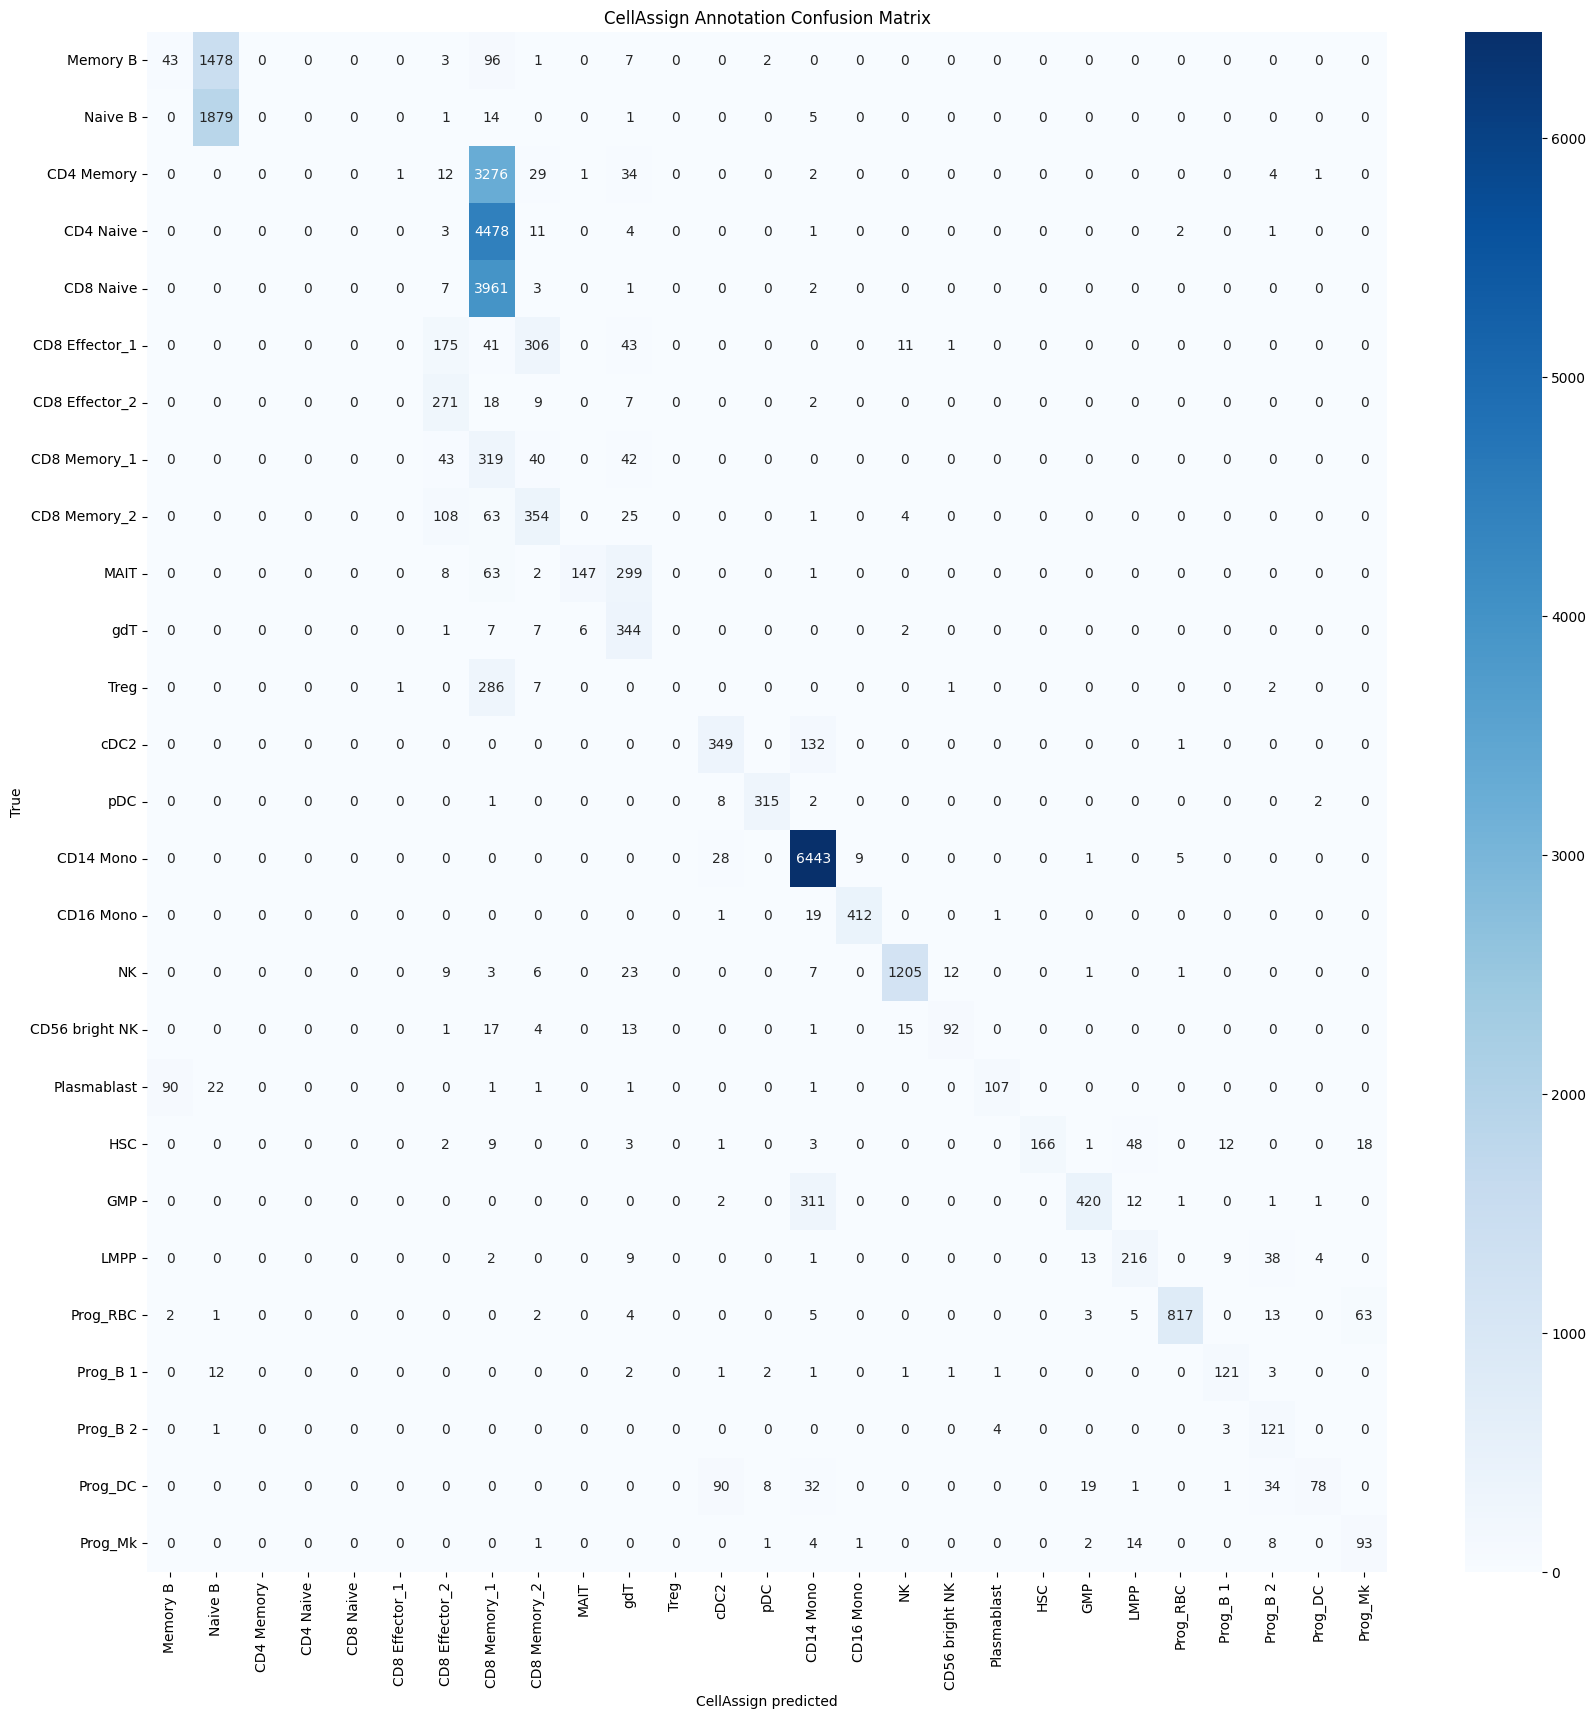

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CellAssign Annotation Confusion Matrix')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

method = ['micro', 'macro', 'weighted']
for m in method:
    precision = precision_score(true_labels, predicted_labels, average=m)
    print(f"{m} Precision:", precision)
    f1 = f1_score(true_labels, predicted_labels, average=m)
    print(f"{m} F1 Score:", f1)

Accuracy: 0.4666145018257694
micro Precision: 0.4666145018257694
micro F1 Score: 0.4666145018257694
macro Precision: 0.5900051300963617


c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


macro F1 Score: 0.5397302520802719
weighted Precision: 0.45020877917348323
weighted F1 Score: 0.433877339365769


c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


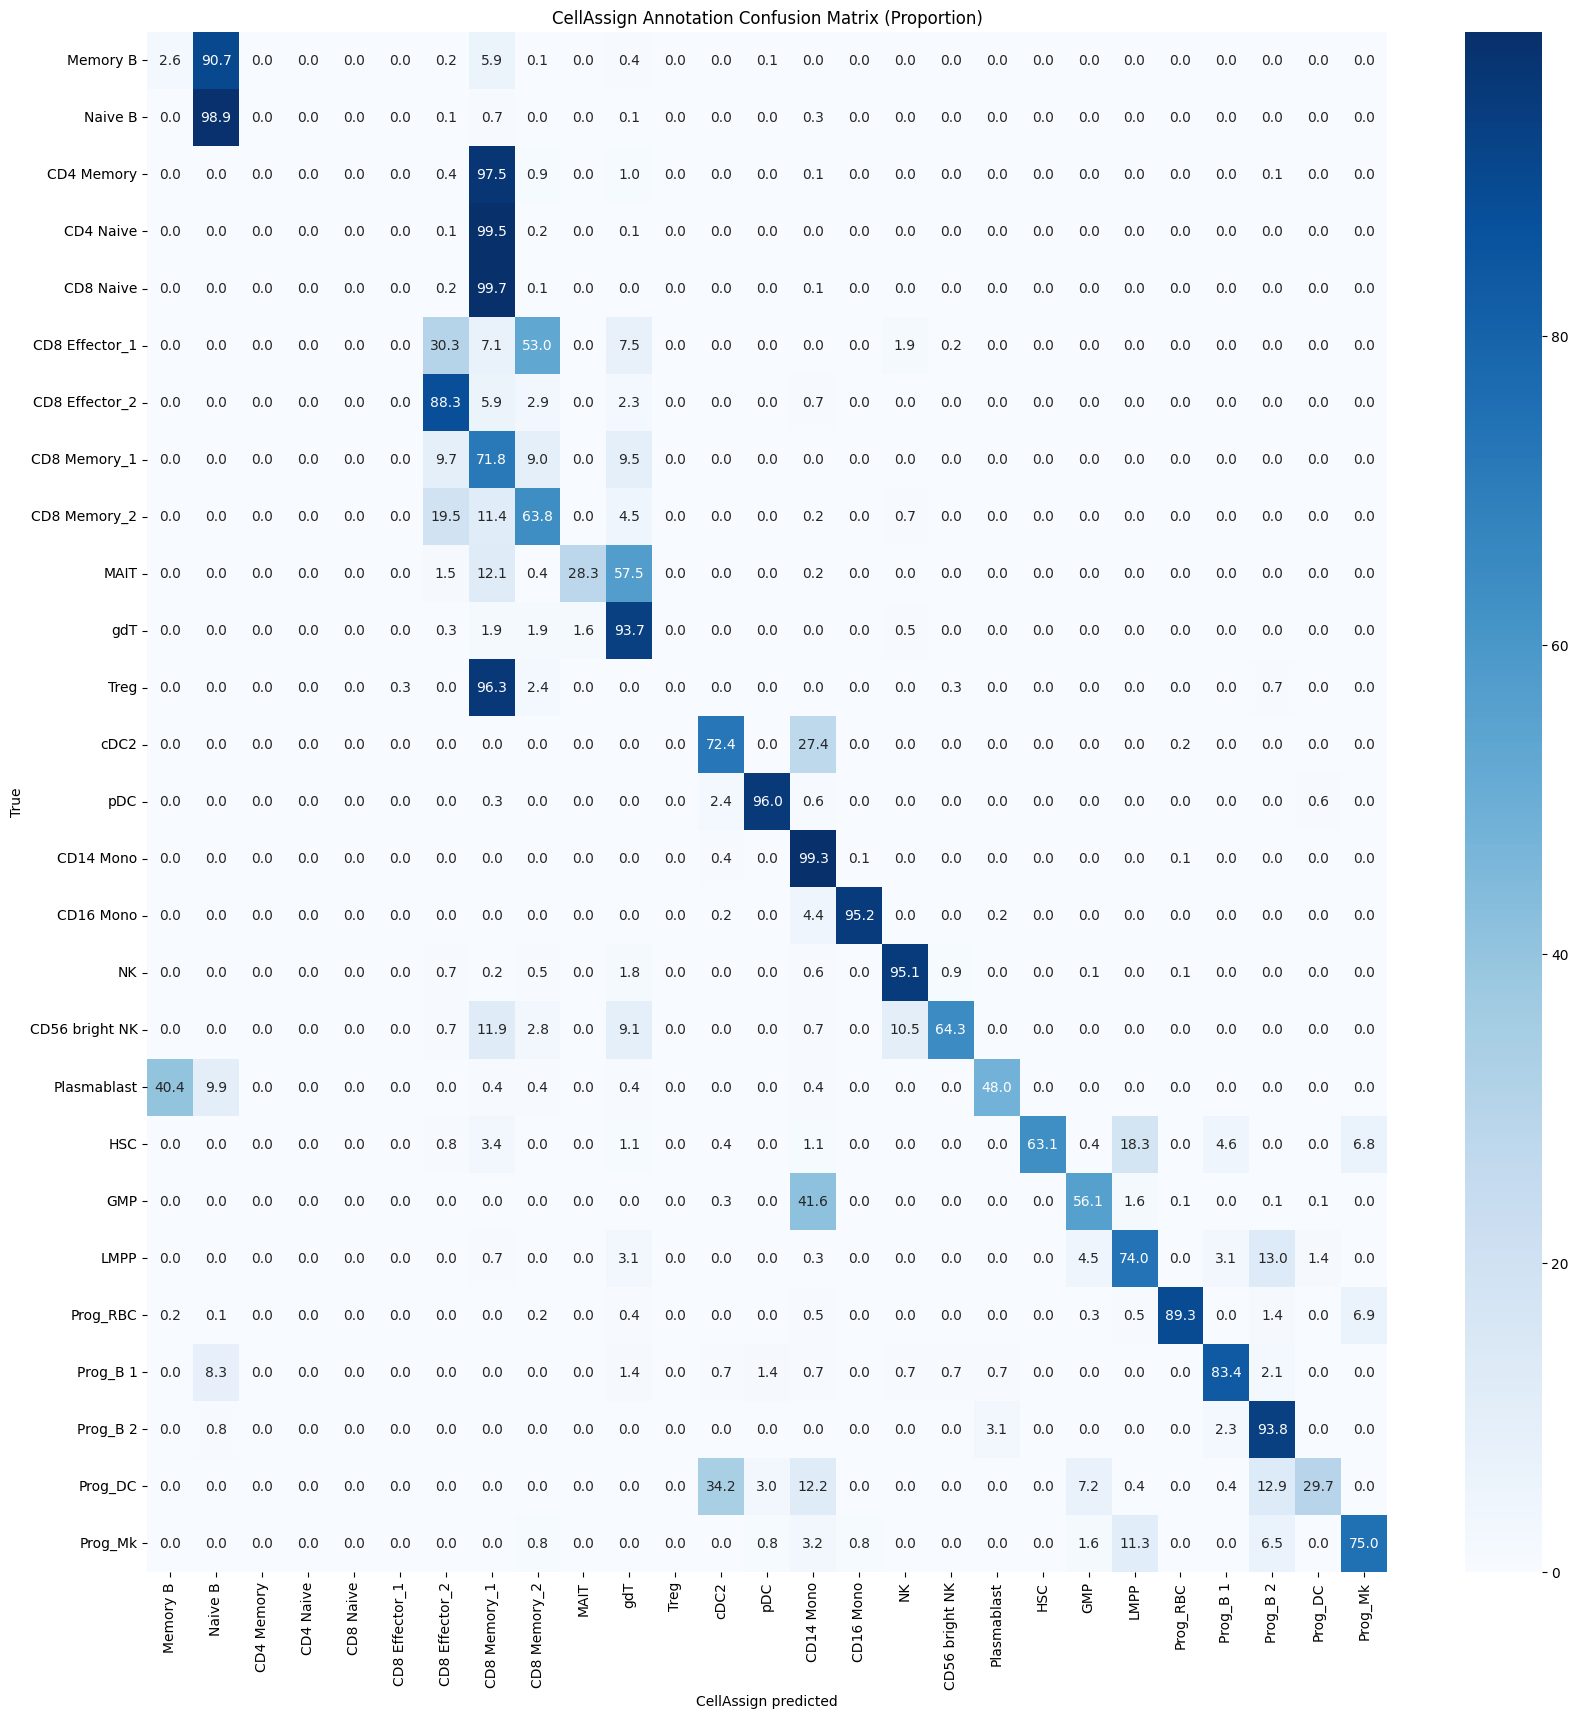

In [11]:
row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0) * 100
plt.figure(figsize=(20, 20))
sns.heatmap(cm_proportion, annot=True, fmt='.1f', cmap='Blues')
plt.title('CellAssign Annotation Confusion Matrix (Proportion)')
plt.show()